# Tarea Regresion Multivariada

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Tomaresmos a X como una matris de dos variables 

In [ ]:
data = np.array([[8500, 2, 2800], [4700, 5, 200], [5800, 3, 400], [7400, 2, 500], [6200, 5, 3200], [7300, 3, 1800], [5600, 4, 900]])
df = pd.DataFrame(columns=['Quantity_Sold', 'Price', 'Advertising'], data=data)
df

In [42]:
Y = df['Quantity_Sold'].values
X = df[['Price', 'Advertising']].values

In [135]:
reg = LinearRegression()
reg.fit(X, Y)
coef = reg.coef_
inter= reg.intercept_
# print(coef, inter)
func = 'y = {}x1 + {}x2 + {}'.format(np.round(coef[0], 3), np.round(coef[1], 3), np.round(inter, 3))
print( func)

y = -835.722x1 + 0.592x2 + 8536.214


La variable objetivo (Quantity sold) decrece con base con la variable x1 (Price) y crece con la variable x2 (Advertising) 

# Estadisticas de la regresion

In [76]:
ypred = reg.predict(X)

r = reg.score(X, Y)
r2  = r**2
n = X.shape[0]
k = X.shape[1]

r2a = 1-((n-1)/(n-k-1))*(1-r2)
err_tip = np.std(ypred)/n

print('Coeficiente de correlacion:',   r2)
print('Coeficiente de determinacion:', r)
print('R2 ajustado:', r2a)
print('Error tipico:', err_tip)
print('Observaciones:', n)

Coeficiente de correlacion: 0.9249362650282591
Coeficiente de determinacion: 0.9617360682787451
R2 ajustado: 0.8874043975423886
Error tipico: 168.11681667035984
Observaciones: 7


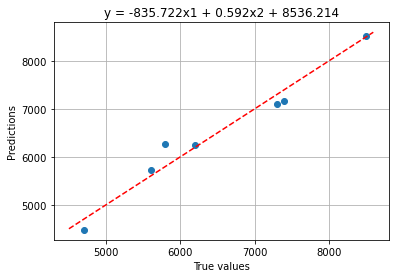

In [137]:
ypred = reg.predict(X)
plt.scatter(Y, ypred)
plt.plot([4500, 8600], [4500, 8600], 'r--')

plt.xlabel('True values')
plt.ylabel('Predictions')
plt.grid()
plt.title(func);

In [14]:
reg.coef_

array([   1.50202156, 1257.54716981])

In [15]:
reg.intercept_

-12674.730458221024

In [85]:
Xc = sm.add_constant(X)
model = sm.OLS(Y, Xc).fit(intercept=False)

In [87]:
predictions = model.predict(Xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     50.27
Date:                Thu, 03 Dec 2020   Prob (F-statistic):            0.00146
Time:                        21:51:47   Log-Likelihood:                -48.142
No. Observations:                   7   AIC:                             102.3
Df Residuals:                       4   BIC:                             102.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8536.2139    386.912     22.062      0.0

C:\Users\nataly.roa\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Al inicio intente generar la tabla estadistica de mi modelo, por medio de ajustes de los datos y usando a statsmodel, usando el intercept, encontramos los ajustes necesarios para que el modelo llegue a la mejor predicción, que encontramos en este resumen del modelo:


*Donde R² tienen una buena estimacion ya que tenemos R² es de 0.92.
*Tenemos que el F nos compara el ajuste del modelo del intercepto del modelo, donde denotamos que rechazamos la hipotessis nula ya que el grado de significancia no es muy menor.
*Tambien notamos que nos da un resumen de cuantas observaciones y el residuo de cada modelo, el residual de los modelos nos ayuda a entender que tanto necesita la data para un buen ajuste dependiendo del dato.


La Segunda tabla

*Encontramos como esta conformado el modelo de regrecion y cuales son sus intervalos de confianza en donde se ajusta el modelo.

Para concluir que el modelo tiene una buena predicción  y ajuste.


In [104]:
results =model.get_prediction()

In [134]:
err_pred = results.conf_int()

Text(0.5, 1.0, 'Model Prediction')

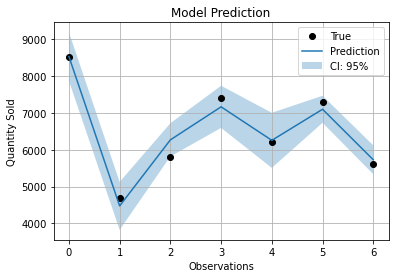

In [140]:
plt.plot(Y, 'ko', label='True')
plt.plot(ypred, label='Prediction')
plt.fill_between(x= np.arange(len(Y)), y1=err_pred[:,0], y2=err_pred[:,1], alpha=0.3, label='CI: 95%' )
plt.legend()
plt.grid()

plt.ylabel('Quantity Sold')
plt.xlabel('Observations')
plt.title('Model Prediction')

De esta grafica podemos ver que el 3 datoes el mas dificil de ajustar y el resto de los punto caen dentro del intervalo de confianza 